<ipython-input-2-f2214aaaa05d>:11: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='polar')


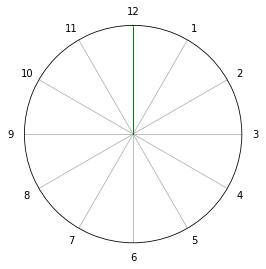

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
from matplotlib import rc

r = 90  * (np.pi/180)
t = 100

# Setup clockface
fig = plt.figure()
ax = fig.gca(projection='polar')
ax.plot(r, t, color ='red', marker='o', markersize = '0')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_ylim(0, 1.02*t)

# Setup clock numbers 1 to 12
ax.set_rticks([])
ticks= np.linspace(0, 360 , 13)[:-1] 
ax.set_xticks(np.deg2rad(ticks))
ticklabels = ["12", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11"]
ax.set_xticklabels(ticklabels, fontsize=10)

# Setup clock hand
clock_hand, = ax.plot([0, 0],[0, t], color = 'green', linewidth = 1)

# Setup Animation
def update(angle):
    clock_hand.set_data([angle, angle], [0, t])
    return clock_hand,

frames = np.linspace(0, 2*np.pi, 60)
fig.canvas.draw()
ani = matplotlib.animation.FuncAnimation(fig, update, frames=frames, blit=True, interval=600)

# This plays the animation in jupyter notebook
rc('animation', html='jshtml')
ani

# Uncomment this to save it as mp4
# If you create this mp4, you can see that the duration of the video is 1min
#ani.save('clock_anim.mp4', fps=1, extra_args=['-vcodec', 'libx264'])